In [1]:
# Cài đặt thư viện cần thiết trước khi import
!pip install rarfile torch torchvision tqdm Pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
# Cài đặt thư viện cần thiết trước khi import
# Gỡ cài đặt các thư viện có thể gây xung đột và cài đặt lại
!pip uninstall -y pandas scikit-learn torch torchvision tqdm Pillow rarfile
!pip install pandas scikit-learn torch torchvision tqdm Pillow rarfile

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: tqdm 4.67.1
Uninstalling tqdm-4.67.1:
  Successfully uninstalled tqdm-4.67.1
Found existing installation: pillow 11.2.1
Uninstalling pillow-11.2.1:
  Successfully uninstalled pillow-11.2.1
Found existing installation: rarfile 4.2
Uninstalling rarfile-4.2:
  Successfully uninstalled rarfile-4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.4 MB/s eta 0:00:00
  Using cac

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split, WeightedRandomSampler
from torchvision import datasets, transforms, models
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from tqdm import tqdm
import rarfile
from google.colab import drive
from PIL import Image # Import Image from Pillow

# 1. Kết nối Google Drive và giải nén dữ liệu
def setup_data(drive_path="/content/drive/MyDrive/data.rar", output_dir="/content/data"):
    # Kết nối Google Drive
    print("Kết nối Google Drive...")
    drive.mount('/content/drive')

    # Giải nén data.rar
    print("Giải nén data.rar...")
    os.makedirs(output_dir, exist_ok=True)
    with rarfile.RarFile(drive_path) as rf:
        rf.extractall(output_dir)
    print(f"Dữ liệu đã giải nén vào {output_dir}")

# 2. Phân tích dữ liệu
def analyze_data(data_dir):
    dataset = datasets.ImageFolder(data_dir)
    samples = dataset.samples
    classes = dataset.classes
    num_classes = len(classes)

    print(f"Số lớp: {num_classes}")
    print(f"Số ảnh: {len(samples)}")
    print(f"Phân bố lớp: {np.bincount([s[1] for s in samples])}")

    sizes = []
    is_grayscale = []
    pixel_means = []
    pixel_stds = []

    for img_path, _ in samples[:100]:
        img = Image.open(img_path)
        sizes.append(img.size)
        is_grayscale.append(img.mode == 'L')
        img_np = np.array(img)
        pixel_means.append(img_np.mean())
        pixel_stds.append(img_np.std())

    print(f"Kích thước ảnh: {set(sizes)}")
    print(f"Tỷ lệ grayscale: {sum(is_grayscale)/len(is_grayscale)*100:.2f}%")
    print(f"Giá trị pixel trung bình: {np.mean(pixel_means):.2f}, độ lệch chuẩn: {np.mean(pixel_stds):.2f}")

# 3. Tiền xử lý và DataLoader
def get_data_loaders(data_dir, img_size, batch_size, num_workers):
    train_transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_size, img_size)),
        transforms.RandomAffine(15, translate=(0.1, 0.1), scale=(0.9, 1.1)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    val_test_transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    full_train = datasets.ImageFolder(os.path.join(data_dir, "train_data"), transform=train_transform)
    n_total = len(full_train)
    n_val = int(0.2 * n_total)
    n_train = n_total - n_val
    train_ds, val_ds = random_split(full_train, [n_train, n_val], generator=torch.Generator().manual_seed(42))
    val_ds.dataset.transform = val_test_transform

    labels = [full_train.samples[i][1] for i in train_ds.indices]
    class_counts = np.bincount(labels, minlength=len(full_train.classes))
    class_weights = 1. / (class_counts + 1e-6)
    sample_weights = [class_weights[l] for l in labels]
    sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

    train_loader = DataLoader(train_ds, batch_size=batch_size, sampler=sampler, num_workers=num_workers, pin_memory=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
    test_ds = datasets.ImageFolder(os.path.join(data_dir, "test_data"), transform=val_test_transform)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

    return train_loader, val_loader, test_loader, full_train.classes, len(full_train.classes)

# 4. Xây dựng mô hình EfficientNet-B0
def build_model(num_classes, device):
    model = models.efficientnet_b0(weights='EfficientNet_B0_Weights.DEFAULT')
    model.features[0][0] = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1, bias=False)
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    return model.to(device)

# 5. Huấn luyện và đánh giá
def train_and_evaluate(train_loader, val_loader, test_loader, model, device, epochs, patience, lr, model_path):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

    best_acc = 0.0
    epochs_no_improve = 0
    train_losses, val_accuracies = [], []

    for epoch in range(1, epochs + 1):
        model.train()
        running_loss = 0.0
        for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch}/{epochs} [Train]"):
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)

        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for imgs, labels in tqdm(val_loader, desc=f"Epoch {epoch}/{epochs} [Val]"):
                imgs = imgs.to(device)
                outputs = model(imgs)
                preds = outputs.argmax(dim=1).cpu().tolist()
                all_preds.extend(preds)
                all_labels.extend(labels.tolist())
        val_acc = accuracy_score(all_labels, all_preds)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch}: train_loss={avg_loss:.4f}, val_acc={val_acc*100:.2f}%")
        scheduler.step()

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), model_path)
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping triggered.")
                break

    # Đánh giá trên tập test
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in tqdm(test_loader, desc="Testing"):
            imgs = imgs.to(device)
            outputs = model(imgs)
            preds = outputs.argmax(dim=1).cpu().tolist()
            all_preds.extend(preds)
            all_labels.extend(labels.tolist())
    test_acc = accuracy_score(all_labels, all_preds)
    print(f"\nTest Accuracy: {test_acc*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=classes, zero_division=0))

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, marker='o')
    plt.title("Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, marker='o')
    plt.title("Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()

# 6. Main
if __name__ == '__main__':
    # Cài đặt thư viện cần thiết
    !pip install rarfile torch torchvision tqdm

    # Tham số
    DRIVE_PATH = "/content/drive/MyDrive/data.rar"  # Kiểm tra lại đường dẫn nếu file data.rar nằm ở thư mục khác
    DATA_DIR = "/content/drive/MyDrive"
    MODEL_PATH = os.path.join(DATA_DIR, "best_model.pt")
    IMG_SIZE = 128
    BATCH_SIZE = 64
    EPOCHS = 30
    PATIENCE = 5
    LR = 3e-4
    NUM_WORKERS = 2

    # Kiểm tra GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Tải và giải nén dữ liệu
    setup_data(DRIVE_PATH, DATA_DIR)

    # Phân tích dữ liệu
    print("Phân tích tập train:")
    analyze_data(os.path.join(DATA_DIR, "train_data"))
    print("Phân tích tập test:")
    analyze_data(os.path.join(DATA_DIR, "test_data"))

    # Load dữ liệu
    train_loader, val_loader, test_loader, classes, num_classes = get_data_loaders(
        DATA_DIR, IMG_SIZE, BATCH_SIZE, NUM_WORKERS
    )

    # Xây dựng và huấn luyện mô hình
    model = build_model(num_classes, device)
    train_and_evaluate(train_loader, val_loader, test_loader, model, device, EPOCHS, PATIENCE, LR, MODEL_PATH)

Using device: cuda
Kết nối Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Giải nén data.rar...
Dữ liệu đã giải nén vào /content/drive/MyDrive
Phân tích tập train:


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/train_data'

Using device: cuda — ✅ GPU
Phân tích tập train:
Số lớp: 24
Số ảnh: 25299
Phân bố lớp: [1100 1100 1099 1099 1100 1100 1100 1100 1100 1102 1099 1100 1100 1100
 1100  825  277 1100 1099 1100 1100 1100 1099 1100]
Kích thước ảnh: {(256, 256)}
Tỷ lệ grayscale: 100.00%
Giá trị pixel trung bình: 3.98, độ lệch chuẩn: 24.28


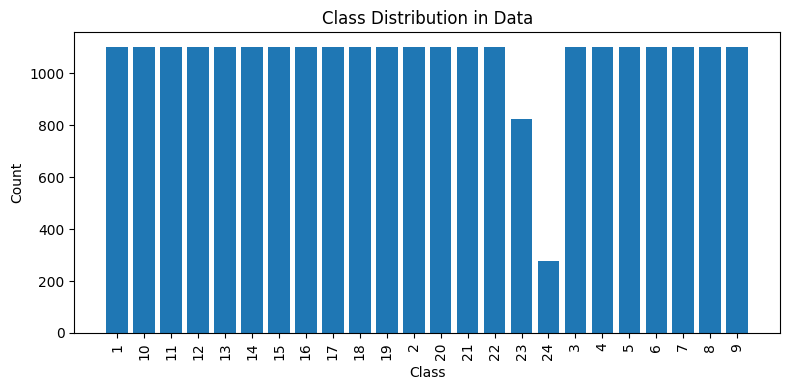

Phân tích tập test:
Số lớp: 24
Số ảnh: 2801
Phân bố lớp: [122 122 122 121 122 121 121 119 122 125 120 120 119 127 121  97  29 120
 122 122 122 121 122 122]
Kích thước ảnh: {(256, 256)}
Tỷ lệ grayscale: 100.00%
Giá trị pixel trung bình: 3.82, độ lệch chuẩn: 23.81


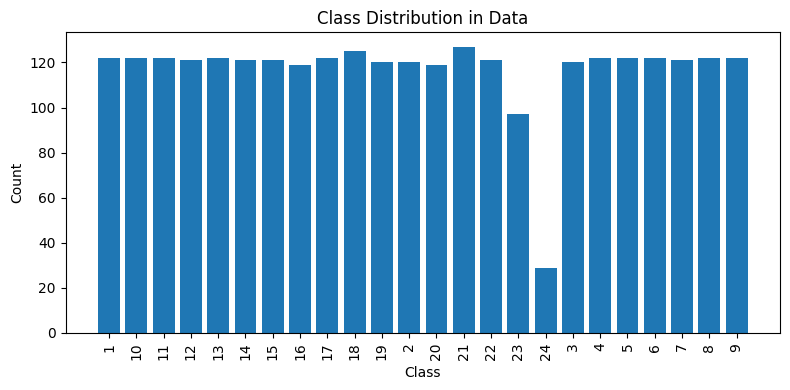

Tổng số tham số: 103,143,832


Epoch 1/30 [Val]: 100%|██████████| 159/159 [00:20<00:00,  7.87it/s]


Epoch 1: train_loss=2.6812, val_acc=30.80%


Epoch 2/30 [Val]: 100%|██████████| 159/159 [00:20<00:00,  7.81it/s]


Epoch 2: train_loss=2.1342, val_acc=38.47%


Epoch 3/30 [Val]: 100%|██████████| 159/159 [00:20<00:00,  7.57it/s]


Epoch 3: train_loss=1.9255, val_acc=54.56%


Epoch 4/30 [Val]: 100%|██████████| 159/159 [00:20<00:00,  7.65it/s]


Epoch 4: train_loss=1.7237, val_acc=62.80%


Epoch 5/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  7.98it/s]


Epoch 5: train_loss=1.5628, val_acc=73.33%


Epoch 6/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  8.20it/s]


Epoch 6: train_loss=1.4212, val_acc=34.61%


Epoch 7/30 [Val]: 100%|██████████| 159/159 [00:20<00:00,  7.82it/s]


Epoch 7: train_loss=1.2780, val_acc=43.05%


Epoch 8/30 [Val]: 100%|██████████| 159/159 [00:20<00:00,  7.64it/s]


Epoch 8: train_loss=1.0964, val_acc=52.22%


Epoch 9/30 [Val]: 100%|██████████| 159/159 [00:20<00:00,  7.78it/s]


Epoch 9: train_loss=0.9997, val_acc=78.59%


Epoch 10/30 [Val]: 100%|██████████| 159/159 [00:21<00:00,  7.23it/s]


Epoch 10: train_loss=0.9492, val_acc=85.45%


Epoch 11/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  8.10it/s]


Epoch 11: train_loss=0.8807, val_acc=82.86%


Epoch 12/30 [Val]: 100%|██████████| 159/159 [00:21<00:00,  7.54it/s]


Epoch 12: train_loss=0.8090, val_acc=89.15%


Epoch 13/30 [Val]: 100%|██████████| 159/159 [01:56<00:00,  1.36it/s]


Epoch 13: train_loss=0.7399, val_acc=89.13%


Epoch 14/30 [Val]: 100%|██████████| 159/159 [00:21<00:00,  7.29it/s]


Epoch 14: train_loss=0.6799, val_acc=89.58%


Epoch 15/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  8.04it/s]


Epoch 15: train_loss=0.5957, val_acc=86.48%


Epoch 16/30 [Val]: 100%|██████████| 159/159 [00:20<00:00,  7.62it/s]


Epoch 16: train_loss=0.5363, val_acc=87.21%


Epoch 17/30 [Val]: 100%|██████████| 159/159 [00:20<00:00,  7.75it/s]


Epoch 17: train_loss=0.5042, val_acc=76.26%


Epoch 18/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  8.11it/s]


Epoch 18: train_loss=0.4708, val_acc=80.47%


Epoch 19/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  8.20it/s]


Epoch 19: train_loss=0.4415, val_acc=93.34%


Epoch 20/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  8.14it/s]


Epoch 20: train_loss=0.4120, val_acc=92.39%


Epoch 21/30 [Val]: 100%|██████████| 159/159 [00:20<00:00,  7.68it/s]


Epoch 21: train_loss=0.4029, val_acc=92.29%


Epoch 22/30 [Val]: 100%|██████████| 159/159 [00:21<00:00,  7.52it/s]


Epoch 22: train_loss=0.3723, val_acc=92.41%


Epoch 23/30 [Val]: 100%|██████████| 159/159 [00:21<00:00,  7.56it/s]


Epoch 23: train_loss=0.3494, val_acc=94.43%


Epoch 24/30 [Val]: 100%|██████████| 159/159 [00:21<00:00,  7.56it/s]


Epoch 24: train_loss=0.3352, val_acc=90.10%


Epoch 25/30 [Val]: 100%|██████████| 159/159 [00:20<00:00,  7.58it/s]


Epoch 25: train_loss=0.3195, val_acc=94.27%


Epoch 26/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  7.97it/s]


Epoch 26: train_loss=0.3060, val_acc=94.41%


Epoch 27/30 [Train]:  20%|██        | 127/633 [00:23<01:27,  5.79it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7af063b3aac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Epoch 27/30 [Val]: 100%|██████████| 159/159 [06:21<00:00,  2.40s/it]


Epoch 27: train_loss=0.2994, val_acc=94.66%


Epoch 28/30 [Val]: 100%|██████████| 159/159 [00:21<00:00,  7.45it/s]


Epoch 28: train_loss=0.2914, val_acc=94.54%


Epoch 29/30 [Val]: 100%|██████████| 159/159 [00:20<00:00,  7.92it/s]


Epoch 29: train_loss=0.2886, val_acc=94.60%


Epoch 30/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  8.08it/s]


Epoch 30: train_loss=0.2833, val_acc=94.60%


Testing: 100%|██████████| 88/88 [00:11<00:00,  7.53it/s]



Test Accuracy: 91.61%

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.92      0.94       122
          10       0.91      0.90      0.91       122
          11       0.97      0.95      0.96       122
          12       0.93      0.97      0.95       121
          13       0.96      0.95      0.95       122
          14       0.97      0.90      0.94       121
          15       0.93      0.93      0.93       121
          16       0.83      0.93      0.88       119
          17       0.90      0.95      0.92       122
          18       0.92      0.97      0.95       125
          19       0.93      0.95      0.94       120
           2       0.86      0.89      0.88       120
          20       0.97      0.89      0.93       119
          21       0.98      0.98      0.98       127
          22       0.92      0.94      0.93       121
          23       0.86      0.89      0.87        97
          24       0.88      0.97 

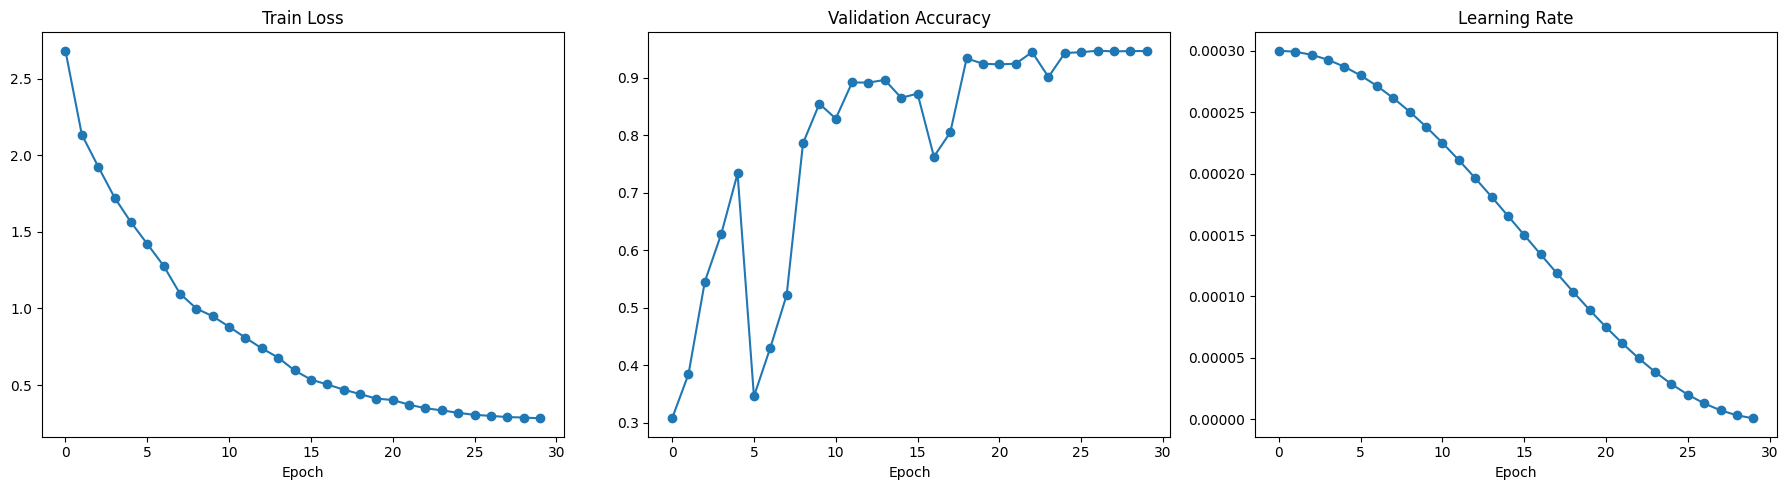

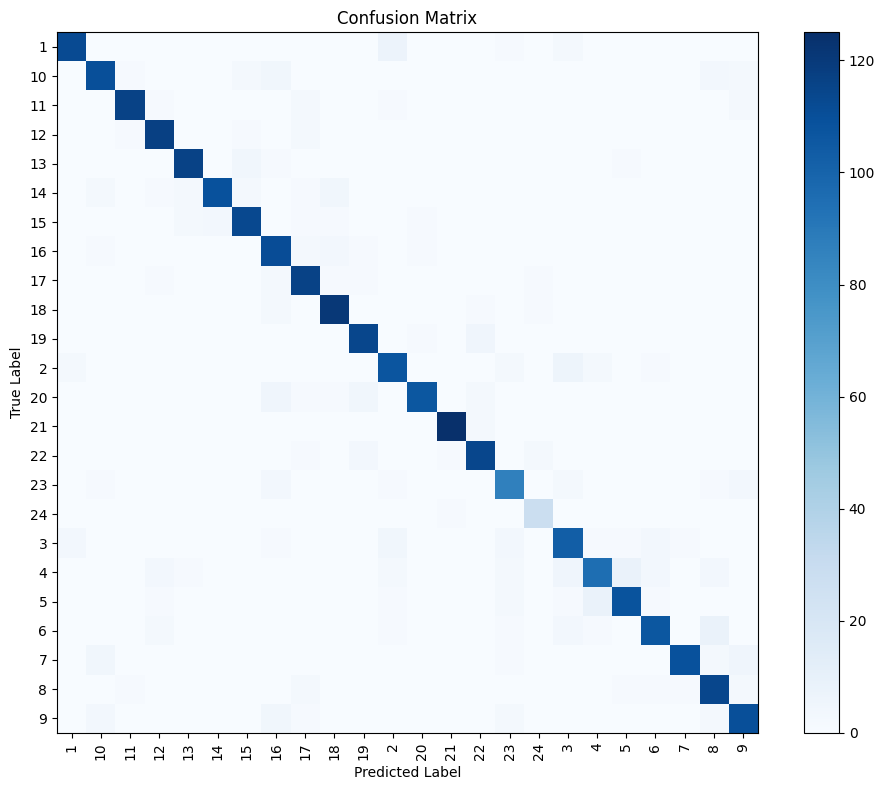


Sample of 12 incorrect predictions:


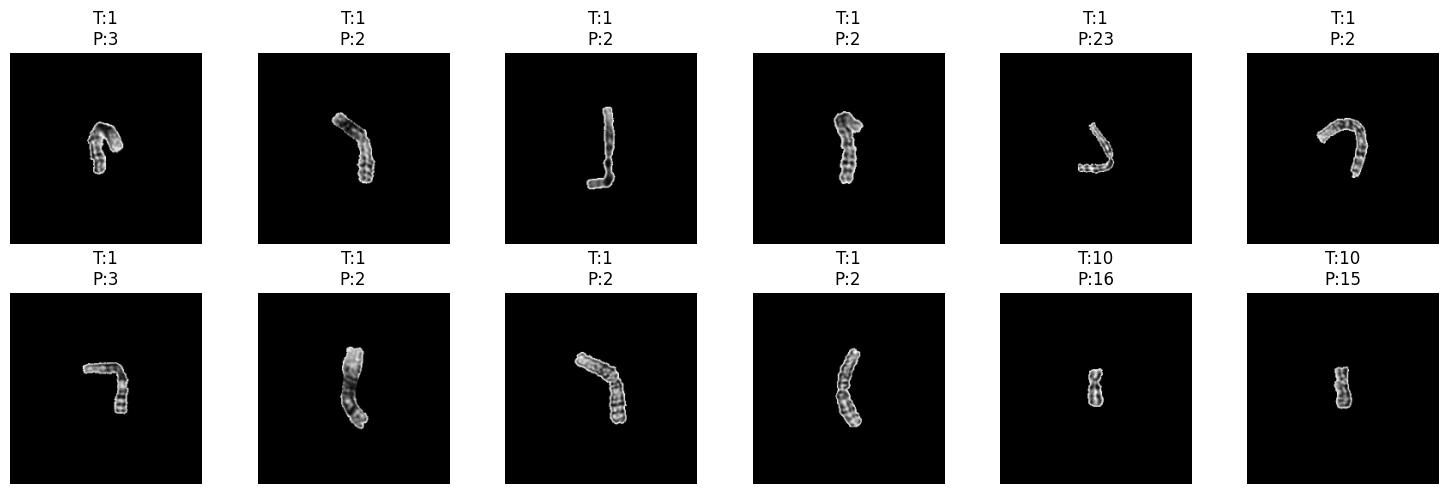

In [11]:
import os
import copy
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split, WeightedRandomSampler
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

# 1. Phân tích dữ liệu
def analyze_data(data_dir):
    dataset = datasets.ImageFolder(data_dir)
    samples = dataset.samples
    classes = dataset.classes
    num_classes = len(classes)

    print(f"Số lớp: {num_classes}")
    print(f"Số ảnh: {len(samples)}")
    print(f"Phân bố lớp: {np.bincount([s[1] for s in samples])}")

    sizes = []
    is_grayscale = []
    pixel_means = []
    pixel_stds = []

    for img_path, _ in samples[:100]:
        img = Image.open(img_path)
        sizes.append(img.size)
        is_grayscale.append(img.mode == 'L')
        img_np = np.array(img)
        pixel_means.append(img_np.mean())
        pixel_stds.append(img_np.std())

    print(f"Kích thước ảnh: {set(sizes)}")
    print(f"Tỷ lệ grayscale: {sum(is_grayscale)/len(is_grayscale)*100:.2f}%")
    print(f"Giá trị pixel trung bình: {np.mean(pixel_means):.2f}, độ lệch chuẩn: {np.mean(pixel_stds):.2f}")

    plt.figure(figsize=(8, 4))
    plt.hist([s[1] for s in samples], bins=np.arange(num_classes+1)-0.5, rwidth=0.8)
    plt.xticks(range(num_classes), classes, rotation=90)
    plt.title("Class Distribution in Data")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 2. Tiền xử lý và DataLoader
def get_data_loaders(data_dir, img_size, batch_size, num_workers):
    train_transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_size, img_size)),
        transforms.RandomAffine(15, translate=(0.1, 0.1), scale=(0.9, 1.1)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    val_test_transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    full_train = datasets.ImageFolder(os.path.join(data_dir, "train_data"), transform=train_transform)
    classes = full_train.classes
    num_classes = len(classes)

    n_total = len(full_train)
    n_val = int(0.2 * n_total)
    n_train = n_total - n_val
    train_ds, val_ds = random_split(full_train, [n_train, n_val], generator=torch.Generator().manual_seed(42))
    val_ds.dataset.transform = val_test_transform

    labels = [full_train.samples[i][1] for i in train_ds.indices]
    class_counts = np.bincount(labels, minlength=num_classes)
    class_weights = 1. / (class_counts + 1e-6)
    sample_weights = [class_weights[l] for l in labels]
    sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

    train_loader = DataLoader(train_ds, batch_size=batch_size, sampler=sampler, num_workers=num_workers, pin_memory=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
    test_ds = datasets.ImageFolder(os.path.join(data_dir, "test_data"), transform=val_test_transform)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

    return train_loader, val_loader, test_loader, classes, num_classes

# 3. Mô hình CNN tùy chỉnh
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        self.features = nn.Sequential(
            # Khối 1: 1x224x224 -> 64x112x112
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Khối 2: 64x112x112 -> 128x56x56
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Khối 3: 128x56x56 -> 256x28x28
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 28 * 28, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

def build_model(num_classes, device):
    model = CustomCNN(num_classes)
    return model.to(device)

# 4. Huấn luyện và đánh giá
def train_and_evaluate(train_loader, val_loader, test_loader, model, device, epochs, patience, lr, model_path):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    epochs_no_improve = 0
    train_losses, val_accuracies, lrs = [], [], []

    for epoch in range(1, epochs + 1):
        model.train()
        running_loss = 0.0
        for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch}/{epochs} [Train]"):
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)

        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for imgs, labels in tqdm(val_loader, desc=f"Epoch {epoch}/{epochs} [Val]"):
                imgs = imgs.to(device)
                outputs = model(imgs)
                preds = outputs.argmax(dim=1).cpu().tolist()
                all_preds.extend(preds)
                all_labels.extend(labels.tolist())
        val_acc = accuracy_score(all_labels, all_preds)
        val_accuracies.append(val_acc)
        lrs.append(scheduler.get_last_lr()[0])

        print(f"Epoch {epoch}: train_loss={avg_loss:.4f}, val_acc={val_acc*100:.2f}%")
        scheduler.step()

        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(best_model_wts, model_path)
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping triggered.")
                break

    model.load_state_dict(best_model_wts)

    model.eval()
    all_preds, all_labels, all_imgs = [], [], []
    with torch.no_grad():
        for imgs, labels in tqdm(test_loader, desc="Testing"):
            imgs = imgs.to(device)
            outputs = model(imgs)
            preds = outputs.argmax(dim=1).cpu().tolist()
            all_preds.extend(preds)
            all_labels.extend(labels.tolist())
            all_imgs.extend(imgs.cpu())

    print(f"\nTest Accuracy: {accuracy_score(all_labels, all_preds)*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=classes, zero_division=0))

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    axs[0].plot(train_losses, marker='o')
    axs[0].set_title("Train Loss")
    axs[1].plot(val_accuracies, marker='o')
    axs[1].set_title("Validation Accuracy")
    axs[2].plot(lrs, marker='o')
    axs[2].set_title("Learning Rate")
    for ax in axs: ax.set_xlabel("Epoch")
    plt.tight_layout()
    plt.savefig(os.path.join(DATA_DIR, "training_plots.png"))
    plt.show()

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(os.path.join(DATA_DIR, "confusion_matrix.png"))
    plt.show()

    incorrect = [(img, true, pred) for img, true, pred in zip(all_imgs, all_labels, all_preds) if true != pred]
    if incorrect:
        print(f"\nSample of {min(12, len(incorrect))} incorrect predictions:")
        plt.figure(figsize=(15, 5))
        for i, (img, true, pred) in enumerate(incorrect[:12]):
            plt.subplot(2, 6, i+1)
            plt.imshow(img.squeeze(), cmap="gray")
            plt.title(f"T:{classes[true]}\nP:{classes[pred]}")
            plt.axis('off')
        plt.tight_layout()
        plt.savefig(os.path.join(DATA_DIR, "misclassified_samples.png"))
        plt.show()

# 5. Main
if __name__ == '__main__':
    DATA_DIR = "/content/drive/MyDrive/data"
    MODEL_PATH = os.path.join(DATA_DIR, "best_model_custom.pt")
    IMG_SIZE = 224
    BATCH_SIZE = 32
    EPOCHS = 30
    PATIENCE = 5
    LR = 3e-4
    NUM_WORKERS = 2

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device} —", "✅ GPU" if device.type == "cuda" else "⚠️ CPU")

    print("Phân tích tập train:")
    analyze_data(os.path.join(DATA_DIR, "train_data"))
    print("Phân tích tập test:")
    analyze_data(os.path.join(DATA_DIR, "test_data"))

    train_loader, val_loader, test_loader, classes, num_classes = get_data_loaders(
        DATA_DIR, IMG_SIZE, BATCH_SIZE, NUM_WORKERS
    )

    model = build_model(num_classes, device)

    # Đếm số tham số
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Tổng số tham số: {total_params:,}")

    train_and_evaluate(train_loader, val_loader, test_loader, model, device, EPOCHS, PATIENCE, LR, MODEL_PATH)

Using device: cuda — ✅ GPU
Phân tích tập train:
Số lớp: 24
Số ảnh: 25299
Phân bố lớp: [1100 1100 1099 1099 1100 1100 1100 1100 1100 1102 1099 1100 1100 1100
 1100  825  277 1100 1099 1100 1100 1100 1099 1100]
Kích thước ảnh: {(256, 256)}
Tỷ lệ grayscale: 100.00%
Giá trị pixel trung bình: 3.98, độ lệch chuẩn: 24.28


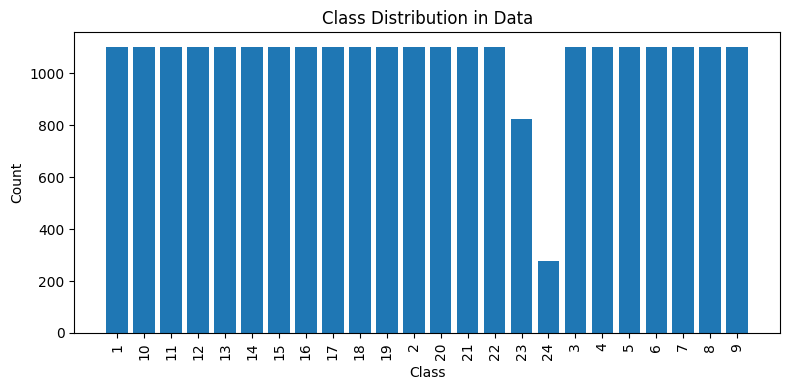

Phân tích tập test:
Số lớp: 24
Số ảnh: 2801
Phân bố lớp: [122 122 122 121 122 121 121 119 122 125 120 120 119 127 121  97  29 120
 122 122 122 121 122 122]
Kích thước ảnh: {(256, 256)}
Tỷ lệ grayscale: 100.00%
Giá trị pixel trung bình: 3.82, độ lệch chuẩn: 23.81


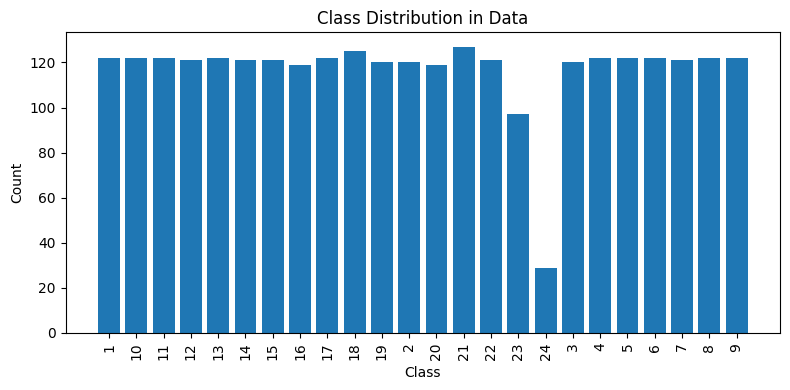

Tổng số tham số: 406,552


Epoch 1/30 [Val]: 100%|██████████| 159/159 [00:21<00:00,  7.35it/s]


Epoch 1: train_loss=2.7592, val_acc=4.53%


Epoch 2/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  8.07it/s]


Epoch 2: train_loss=2.3390, val_acc=4.49%


Epoch 3/30 [Val]: 100%|██████████| 159/159 [00:21<00:00,  7.55it/s]


Epoch 3: train_loss=2.1772, val_acc=8.32%


Epoch 4/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  7.97it/s]


Epoch 4: train_loss=2.1063, val_acc=4.82%


Epoch 5/30 [Val]: 100%|██████████| 159/159 [00:21<00:00,  7.37it/s]


Epoch 5: train_loss=2.0403, val_acc=4.41%


Epoch 6/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  8.07it/s]


Epoch 6: train_loss=1.9935, val_acc=4.49%


Epoch 7/30 [Val]: 100%|██████████| 159/159 [00:20<00:00,  7.68it/s]


Epoch 7: train_loss=1.9646, val_acc=4.49%


Epoch 8/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  8.07it/s]


Epoch 8: train_loss=1.9328, val_acc=4.49%


Epoch 9/30 [Val]: 100%|██████████| 159/159 [00:20<00:00,  7.65it/s]


Epoch 9: train_loss=1.9034, val_acc=4.41%


Epoch 10/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  8.22it/s]


Epoch 10: train_loss=1.8817, val_acc=4.78%


Epoch 11/30 [Val]: 100%|██████████| 159/159 [00:19<00:00,  8.04it/s]


Epoch 11: train_loss=1.8646, val_acc=4.49%


Epoch 12/30 [Train]:  71%|███████   | 451/633 [01:07<00:27,  6.69it/s]


KeyboardInterrupt: 

In [7]:
import os
import copy
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split, WeightedRandomSampler
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

# 1. Phân tích dữ liệu
def analyze_data(data_dir):
    dataset = datasets.ImageFolder(data_dir)
    samples = dataset.samples
    classes = dataset.classes
    num_classes = len(classes)

    print(f"Số lớp: {num_classes}")
    print(f"Số ảnh: {len(samples)}")
    print(f"Phân bố lớp: {np.bincount([s[1] for s in samples])}")

    sizes = []
    is_grayscale = []
    pixel_means = []
    pixel_stds = []

    for img_path, _ in samples[:100]:
        img = Image.open(img_path)
        sizes.append(img.size)
        is_grayscale.append(img.mode == 'L')
        img_np = np.array(img)
        pixel_means.append(img_np.mean())
        pixel_stds.append(img_np.std())

    print(f"Kích thước ảnh: {set(sizes)}")
    print(f"Tỷ lệ grayscale: {sum(is_grayscale)/len(is_grayscale)*100:.2f}%")
    print(f"Giá trị pixel trung bình: {np.mean(pixel_means):.2f}, độ lệch chuẩn: {np.mean(pixel_stds):.2f}")

    plt.figure(figsize=(8, 4))
    plt.hist([s[1] for s in samples], bins=np.arange(num_classes+1)-0.5, rwidth=0.8)
    plt.xticks(range(num_classes), classes, rotation=90)
    plt.title("Class Distribution in Data")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 2. Tiền xử lý và DataLoader
def get_data_loaders(data_dir, img_size, batch_size, num_workers):
    train_transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_size, img_size)),
        transforms.RandomAffine(15, translate=(0.1, 0.1), scale=(0.9, 1.1)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    val_test_transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    full_train = datasets.ImageFolder(os.path.join(data_dir, "train_data"), transform=train_transform)
    classes = full_train.classes
    num_classes = len(classes)

    n_total = len(full_train)
    n_val = int(0.2 * n_total)
    n_train = n_total - n_val
    train_ds, val_ds = random_split(full_train, [n_train, n_val], generator=torch.Generator().manual_seed(42))
    val_ds.dataset.transform = val_test_transform

    labels = [full_train.samples[i][1] for i in train_ds.indices]
    class_counts = np.bincount(labels, minlength=num_classes)
    class_weights = 1. / (class_counts + 1e-6)
    sample_weights = [class_weights[l] for l in labels]
    sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

    train_loader = DataLoader(train_ds, batch_size=batch_size, sampler=sampler, num_workers=num_workers, pin_memory=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
    test_ds = datasets.ImageFolder(os.path.join(data_dir, "test_data"), transform=val_test_transform)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

    return train_loader, val_loader, test_loader, classes, num_classes

# 3. Mô hình CNN tùy chỉnh (sửa đổi)
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        self.features = nn.Sequential(
            # Khối 1: 1x224x224 -> 64x112x112
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Khối 2: 64x112x112 -> 128x56x56
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Khối 3: 128x56x56 -> 256x28x28
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))  # Global Average Pooling
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)  # 256x28x28 -> 256x1x1
        x = self.classifier(x)
        return x

def build_model(num_classes, device):
    model = CustomCNN(num_classes)
    return model.to(device)

# 4. Huấn luyện và đánh giá
def train_and_evaluate(train_loader, val_loader, test_loader, model, device, epochs, patience, lr, model_path):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    epochs_no_improve = 0
    train_losses, val_accuracies, lrs = [], [], []

    for epoch in range(1, epochs + 1):
        model.train()
        running_loss = 0.0
        for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch}/{epochs} [Train]"):
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)

        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for imgs, labels in tqdm(val_loader, desc=f"Epoch {epoch}/{epochs} [Val]"):
                imgs = imgs.to(device)
                outputs = model(imgs)
                preds = outputs.argmax(dim=1).cpu().tolist()
                all_preds.extend(preds)
                all_labels.extend(labels.tolist())
        val_acc = accuracy_score(all_labels, all_preds)
        val_accuracies.append(val_acc)
        lrs.append(scheduler.get_last_lr()[0])

        print(f"Epoch {epoch}: train_loss={avg_loss:.4f}, val_acc={val_acc*100:.2f}%")
        scheduler.step()

        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(best_model_wts, model_path)
            epochs_no_improve = 0

    model.load_state_dict(best_model_wts)

    model.eval()
    all_preds, all_labels, all_imgs = [], [], []
    with torch.no_grad():
        for imgs, labels in tqdm(test_loader, desc="Testing"):
            imgs = imgs.to(device)
            outputs = model(imgs)
            preds = outputs.argmax(dim=1).cpu().tolist()
            all_preds.extend(preds)
            all_labels.extend(labels.tolist())
            all_imgs.extend(imgs.cpu())

    print(f"\nTest Accuracy: {accuracy_score(all_labels, all_preds)*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=classes, zero_division=0))

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    axs[0].plot(train_losses, marker='o')
    axs[0].set_title("Train Loss")
    axs[1].plot(val_accuracies, marker='o')
    axs[1].set_title("Validation Accuracy")
    axs[2].plot(lrs, marker='o')
    axs[2].set_title("Learning Rate")
    for ax in axs: ax.set_xlabel("Epoch")
    plt.tight_layout()
    plt.savefig(os.path.join(DATA_DIR, "training_plots.png"))
    plt.show()

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(os.path.join(DATA_DIR, "confusion_matrix.png"))
    plt.show()

    incorrect = [(img, true, pred) for img, true, pred in zip(all_imgs, all_labels, all_preds) if true != pred]
    if incorrect:
        print(f"\nSample of {min(12, len(incorrect))} incorrect predictions:")
        plt.figure(figsize=(15, 5))
        for i, (img, true, pred) in enumerate(incorrect[:12]):
            plt.subplot(2, 6, i+1)
            plt.imshow(img.squeeze(), cmap="gray")
            plt.title(f"T:{classes[true]}\nP:{classes[pred]}")
            plt.axis('off')
        plt.tight_layout()
        plt.savefig(os.path.join(DATA_DIR, "misclassified_samples.png"))
        plt.show()

# 5. Main
if __name__ == '__main__':

    DATA_DIR = "/content/drive/MyDrive/data"
    MODEL_PATH = os.path.join(DATA_DIR, "best_model_custom.pt")
    IMG_SIZE = 224
    BATCH_SIZE = 32
    EPOCHS = 30
    PATIENCE = 5
    LR = 3e-4
    NUM_WORKERS = 2

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device} —", "✅ GPU" if device.type == "cuda" else "⚠️ CPU")

    print("Phân tích tập train:")
    analyze_data(os.path.join(DATA_DIR, "train_data"))
    print("Phân tích tập test:")
    analyze_data(os.path.join(DATA_DIR, "test_data"))

    train_loader, val_loader, test_loader, classes, num_classes = get_data_loaders(
        DATA_DIR, IMG_SIZE, BATCH_SIZE, NUM_WORKERS
    )

    model = build_model(num_classes, device)

    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Tổng số tham số: {total_params:,}")

    train_and_evaluate(train_loader, val_loader, test_loader, model, device, EPOCHS, PATIENCE, LR, MODEL_PATH)